# Asignación Cuadrillas: Ejecuciones del modelo

Aquí presentaremos las ejecuciones que utilizamos para reportar en el informe

In [1]:
import cplex
from asignacion_cuadrillas import armar_lp, resolver_lp, mostrar_solucion, cargar_instancia_con_configuracion
from cplex._internal._constants import CPX_VARSEL_DEFAULT, CPX_VARSEL_STRONG, CPX_OFF, CPX_VARSEL_PSEUDO, CPX_NODESEL_DFS, CPX_NODESEL_BESTEST
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def configurar_y_resolver(path, shouldShowSolution = True, **config):
    instancia = cargar_instancia_con_configuracion(path, **config)
    prob = cplex.Cplex()
    armar_lp(prob, instancia, shouldWrite=False)
    resolver_lp(prob, instancia)

    if shouldShowSolution:
        mostrar_solucion(prob, instancia)

    return prob, instancia

In [3]:
def promediar_n_tiempos(n,path,**config):
    tiempos =[]
    cont = 0
    while cont != n:
        _, instancia = configurar_y_resolver(path, **config)
        tiempos.append(instancia.tiempo_de_computo)
        cont = cont + 1
    tiempo_medio = np.mean(tiempos)
    return tiempo_medio

## Análisis Algorítmico

### Calculamos los tiempos para los distintos niveles de esfuerzo en la **heurística primal**, únicamente para la entrada mediana.

In [4]:
valores = [0,0.5,1,1.5,2]
tiempos_valores_heuristica = []
for i in valores:
    tiempo_i = promediar_n_tiempos(5,"./entradas/entrada_mediana.txt", preproceso = CPX_OFF, heuristica_primal = i)
    tiempos_valores_heuristica.append(tiempo_i)

print(valores,tiempos_valores_heuristica)

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Preprocessing_Presolve                  0
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Tolerances_MIPGap                   9.9999999999999995e-07
CPXPARAM_MIP_Strategy_HeuristicEffort            0
Clique table members: 21814.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 16 threads.
Root relaxation solution time = 24.73 sec. (3903.83 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

      0     0   182000.0000   140                 182000.0000     2205         
Detecting symmetries...
*     0     0      integral     0   182000.0000   182000.0000     2205    0.00%
      0     0   182000.0000     0   182000.0000   182000.0000     2205    0.00%
Elapsed time = 89.27 sec. (32264.97 ticks, tree = 0.02 MB, solutions = 0)

Root node proc

Text(0, 0.5, 'Tiempo medio de ejecucion (seg)')

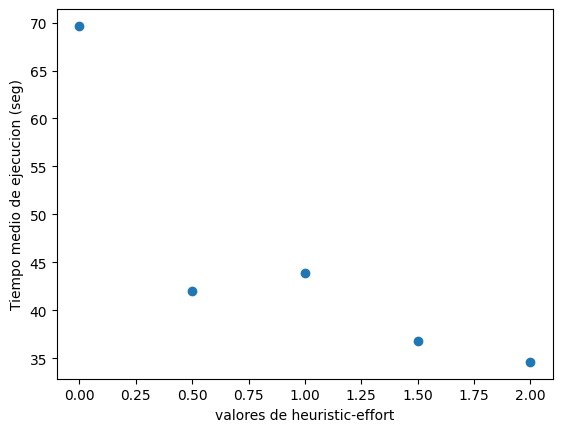

In [ ]:
plt.scatter(valores,tiempos_valores_heuristica)
plt.xlabel('valores de heuristic-effort')
plt.ylabel('Tiempo medio de ejecucion (seg)')

### Comparamos tiempo activando/desactivando **preprocesamiento**

Sin preprocesamiento, entrada mediana

In [5]:
tiempo_medio_sin_preprocesamiento = promediar_n_tiempos(5,"./entradas/entrada_mediana.txt", preproceso = CPX_OFF)

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Preprocessing_Presolve                  0
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Tolerances_MIPGap                   9.9999999999999995e-07
Found incumbent of value 0.000000 after 0.02 sec. (9.54 ticks)
Clique table members: 21814.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 16 threads.
Root relaxation solution time = 19.50 sec. (3903.83 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0                            0.0000   1.22850e+07              --- 
      0     0   182000.0000   140        0.0000   182000.0000     2205     --- 
*     0+    0                       182000.0000   182000.0000             0.00%
      0     0        cutoff         182000.0000   182000.0000     2205    0.00%
Elapsed time = 39.73 

In [7]:
print("Tiempo:", tiempo_medio_sin_preprocesamiento)

Tiempo: 29.12179999998771


Con preprocesamiento (default de CPLEX), entrada mediana

In [8]:
tiempo_medio_preprocesamiento = promediar_n_tiempos(5,"./entradas/entrada_mediana.txt")


Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Tolerances_MIPGap                   9.9999999999999995e-07
Found incumbent of value 0.000000 after 0.00 sec. (9.54 ticks)
Tried aggregator 1 time.
MIP Presolve eliminated 10956 rows and 128 columns.
Reduced MIP has 1599174 rows, 13044 columns, and 7087242 nonzeros.
Reduced MIP has 12924 binaries, 120 generals, 0 SOSs, and 0 indicators.
Presolve time = 4.59 sec. (5613.92 ticks)
Probing time = 1.36 sec. (195.31 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 1599174 rows, 13044 columns, and 7087242 nonzeros.
Reduced MIP has 12924 binaries, 120 generals, 0 SOSs, and 0 indicators.
Presolve time = 31.62 sec. (11306.68 ticks)
Probing time = 1.34 sec. (182.41 ticks)
Clique table members: 58971.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 16 threads.
Root relaxation soluti

In [9]:
print("Tiempo:", round(tiempo_medio_preprocesamiento, 5))

Tiempo: 109.53


Con preprocesamiento (default de CPLEX), entrada grande

In [10]:
tiempo_medio_grande_con_pre = promediar_n_tiempos(1,"./entradas/entrada_grande.txt")

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Tolerances_MIPGap                   9.9999999999999995e-07
Found incumbent of value 0.000000 after 0.02 sec. (22.24 ticks)
Tried aggregator 1 time.
MIP Presolve eliminated 142930 rows and 540 columns.
Reduced MIP has 3598520 rows, 32820 columns, and 20477810 nonzeros.
Reduced MIP has 32420 binaries, 400 generals, 0 SOSs, and 0 indicators.
Presolve time = 12.52 sec. (9560.14 ticks)
Probing time = 6.22 sec. (494.00 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Elapsed time for symmetry detection = 39.06 sec. (10019.27 ticks)
Elapsed time for symmetry detection = 92.19 sec. (20020.85 ticks)
Found 6.688094e+166 symmetric permutations.
Reduced MIP has 3598520 rows, 32820 columns, and 20477810 nonzeros.
Reduced MIP has 32420 binaries, 400 generals, 0 SOSs, and 0 indicators.
Presolve time = 134.64 sec. (36342.68 ticks)
Probing time = 12.47 sec. (459.16 ticks)
Clique 

In [11]:
print("Tiempo:", tiempo_medio_grande_con_pre)

Tiempo: 226.89100000000326


Sin preprocesamiento, entrada grande

In [12]:
tiempo_medio_grande_sin_pre = promediar_n_tiempos(1,"./entradas/entrada_grande.txt", preproceso = CPX_OFF)

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Preprocessing_Presolve                  0
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Tolerances_MIPGap                   9.9999999999999995e-07
Found incumbent of value 0.000000 after 0.03 sec. (22.24 ticks)
Clique table members: 65570.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 16 threads.
Root relaxation solution time = 19.89 sec. (1516.10 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0                            0.0000  2571000.0000              --- 
      0     0        cutoff              0.0000        0.0000        0    0.00%
      0     0        cutoff              0.0000        0.0000        0    0.00%
Elapsed time = 30.31 sec. (5761.73 ticks, tree = 0.01 MB, solutions = 1)

Root node processing (befo

In [13]:
print("Tiempo:", tiempo_medio_grande_sin_pre)

Tiempo: 30.48499999998603


### Comparamos tiempo con distintos **criterios de selección de variables (branching)**

Entrada **mediana**

In [14]:
#Tiempo medio usando StrongBranching
tiempo_medio_strong_b=promediar_n_tiempos(5,"./entradas/entrada_mediana.txt", preproceso = CPX_OFF, seleccion_variable = CPX_VARSEL_STRONG)
#Tiempo medio usando Pseudocosto
tiempo_medio_pseudocosto = promediar_n_tiempos(5,"./entradas/entrada_mediana.txt",preproceso = CPX_OFF, seleccion_variable = CPX_VARSEL_PSEUDO)
#Tiempo medio usando el criterio default de CPLEX
tiempo_medio_default = promediar_n_tiempos(5,"./entradas/entrada_mediana.txt", preproceso = CPX_OFF, seleccion_variable = CPX_VARSEL_DEFAULT)

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Preprocessing_Presolve                  0
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Strategy_VariableSelect             3
CPXPARAM_MIP_Tolerances_MIPGap                   9.9999999999999995e-07
Found incumbent of value 0.000000 after 0.03 sec. (9.54 ticks)
Clique table members: 21814.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 16 threads.
Root relaxation solution time = 18.06 sec. (3903.83 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0                            0.0000   1.22850e+07              --- 
      0     0   182000.0000   140        0.0000   182000.0000     2205     --- 
*     0+    0                       182000.0000   182000.0000             0.00%
      0     0        cutoff         182000.0000   

In [ ]:

print('Tiempo medio con criterio de strongBranching: ',tiempo_medio_strong_b)
print('tiempo medio con criterio de pseudocosto: ',tiempo_medio_pseudocosto)
print('Tiempo medio con criterio default de cplex: ',tiempo_medio_default)

Tiempo medio con criterio de strongBranching:  29.446400000015274
tiempo medio con criterio de pseudocosto:  29.131199999991804
Tiempo medio con criterio default de cplex:  29.115599999984262


Entrada **grande**

In [ ]:
#Tiempo medio usando StrongBranching
tiempo_medio_strong_b=promediar_n_tiempos(1,"./entradas/entrada_grande.txt", preproceso = CPX_OFF, seleccion_variable = CPX_VARSEL_STRONG)
#Tiempo medio usando Pseudocosto
tiempo_medio_pseudocosto = promediar_n_tiempos(1,"./entradas/entrada_grande.txt",preproceso = CPX_OFF, seleccion_variable = CPX_VARSEL_PSEUDO)
#Tiempo medio usando el criterio default de CPLEX
tiempo_medio_default = promediar_n_tiempos(1,"./entradas/entrada_grande.txt", preproceso = CPX_OFF, seleccion_variable = CPX_VARSEL_DEFAULT)

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Preprocessing_Presolve                  0
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Strategy_VariableSelect             3
CPXPARAM_MIP_Tolerances_MIPGap                   9.9999999999999995e-07
Found incumbent of value 0.000000 after 0.02 sec. (22.24 ticks)
Clique table members: 65570.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 16 threads.
Root relaxation solution time = 27.61 sec. (1457.13 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0                            0.0000  2571000.0000              --- 
      0     0        cutoff              0.0000        0.0000        0    0.00%
      0     0        cutoff              0.0000        0.0000        0    0.00%
Elapsed time = 49.22 sec. (5712.24 ticks, tree = 

In [ ]:
print('Tiempo medio con criterio de StrongBranching: ', tiempo_medio_strong_b)
print('tiempo medio con criterio de Pseudocosto: ', tiempo_medio_pseudocosto)
print('Tiempo medio con criterio default de CPLEX: ', tiempo_medio_default)

Tiempo medio con criterio de strongBranching:  49.50000000000182
tiempo medio con criterio de pseudocosto:  42.17199999999866
Tiempo medio con criterio default de cplex:  45.125


### Comparamos tiempo con distintos **criterios de selección de nodo (recorrido del árbol B&B)**

Entrada **mediana**

In [5]:
# En profundidad
tiempo_medio_deep = promediar_n_tiempos(5,"./entradas/entrada_mediana.txt", preproceso = CPX_OFF, seleccion_nodo = CPX_NODESEL_DFS)

# Mejor cota
tiempo_medio_bestbound = promediar_n_tiempos(5,"./entradas/entrada_mediana.txt", preproceso = CPX_OFF)

# Mejor estimación
tiempo_medio_bestestimate = promediar_n_tiempos(5,"./entradas/entrada_mediana.txt", preproceso = CPX_OFF, seleccion_nodo = CPX_NODESEL_BESTEST)


Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Preprocessing_Presolve                  0
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Tolerances_MIPGap                   9.9999999999999995e-07
Found incumbent of value 0.000000 after 0.02 sec. (9.54 ticks)
Clique table members: 21814.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 16 threads.
Root relaxation solution time = 25.41 sec. (3903.83 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0                            0.0000   1.22850e+07              --- 
      0     0   182000.0000   140        0.0000   182000.0000     2205     --- 
*     0+    0                       182000.0000   182000.0000             0.00%
      0     0        cutoff         182000.0000   182000.0000     2205    0.00%
Elapsed time = 48.42 

In [ ]:
print('Tiempo medio usando criterio de profundidad: ', tiempo_medio_deep)
print('tiempo medio usando mejor cota: ', tiempo_medio_bestbound)
print('tiempo medio usando mejor estimación: ', tiempo_medio_bestestimate)

Tiempo medio usando criterio de profundidad:  29.712799999990967
tiempo medio usando bestStimate:  30.102800000004937


Entrada **grande**

In [ ]:
tiempo_medio_bestbound = promediar_n_tiempos(1,"./entradas/entrada_grande.txt", preproceso = CPX_OFF)
tiempo_medio_deep = promediar_n_tiempos(1,"./entradas/entrada_grande.txt", preproceso = CPX_OFF, seleccion_nodo = CPX_NODESEL_DFS)
tiempo_medio_bestestimate = promediar_n_tiempos(1,"./entradas/entrada_grande.txt", preproceso = CPX_OFF, seleccion_nodo = CPX_NODESEL_BESTEST)

print(tiempo_medio_deep)
print(tiempo_medio_bestbound)
print(tiempo_medio_bestestimate)


Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Preprocessing_Presolve                  0
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Tolerances_MIPGap                   9.9999999999999995e-07
Found incumbent of value 0.000000 after 0.02 sec. (22.24 ticks)
Clique table members: 65570.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 16 threads.
Root relaxation solution time = 42.61 sec. (1457.13 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0                            0.0000  2571000.0000              --- 
      0     0        cutoff              0.0000        0.0000        0    0.00%
      0     0        cutoff              0.0000        0.0000        0    0.00%
Elapsed time = 62.62 sec. (5712.24 ticks, tree = 0.01 MB, solutions = 1)

Root node processing (befo

## Análisis de Datos

### Probamos activando/desactivando las restricciones deseables

Sin restricciones deseables

In [4]:
configurar_y_resolver("./entradas/entrada_pequena.txt", preproceso = CPX_OFF)

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Preprocessing_Presolve                  0
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Tolerances_MIPGap                   9.9999999999999995e-07
Found incumbent of value 0.000000 after 0.00 sec. (0.14 ticks)
Clique table members: 1411.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 16 threads.
Root relaxation solution time = 0.14 sec. (68.02 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0                            0.0000  7743000.0000              --- 
      0     0   210000.0000    60        0.0000   210000.0000      809     --- 
*     0+    0                       210000.0000   210000.0000             0.00%
      0     0        cutoff         210000.0000   210000.0000      813    0.00%
Elapsed time = 0.41 sec. 

(<cplex.Cplex at 0x21977635450>,
 <asignacion_cuadrillas.InstanciaAsignacionCuadrillas at 0x219776356f0>)

Con restricciones deseables

In [5]:
configurar_y_resolver("./entradas/entrada_pequena.txt", activar_restriccion_opcional_1 = True, activar_restriccion_opcional_2 = True, preproceso = CPX_OFF)

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Preprocessing_Presolve                  0
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Tolerances_MIPGap                   9.9999999999999995e-07
Found incumbent of value 0.000000 after 0.00 sec. (0.14 ticks)
Clique table members: 1497.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 16 threads.
Root relaxation solution time = 0.09 sec. (68.81 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0                            0.0000  7743000.0000              --- 
      0     0   200222.2222   119        0.0000   200222.2222      869     --- 
*     0+    0                       109000.0000   200222.2222            83.69%
      0     0        cutoff         109000.0000                   1196     --- 
Elapsed time = 0.67 sec. 

(<cplex.Cplex at 0x21977635fc0>,
 <asignacion_cuadrillas.InstanciaAsignacionCuadrillas at 0x21917a99660>)

Agregando únicamente restricción conflictos entre trabajadores (restricción (i))

In [6]:
configurar_y_resolver("./entradas/entrada_pequena.txt", activar_restriccion_opcional_1 = True, preproceso = CPX_OFF)

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Preprocessing_Presolve                  0
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Tolerances_MIPGap                   9.9999999999999995e-07
Found incumbent of value 0.000000 after 0.00 sec. (0.14 ticks)
Clique table members: 1477.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 16 threads.
Root relaxation solution time = 0.09 sec. (81.06 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0                            0.0000  7743000.0000              --- 
      0     0   210000.0000   139        0.0000   210000.0000     1210     --- 
*     0+    0                       107000.0000   210000.0000            96.26%
*     0     0      integral     0   120000.0000   120000.0000     1717    0.00%
Elapsed time = 0.62 sec. 

(<cplex.Cplex at 0x21977602320>,
 <asignacion_cuadrillas.InstanciaAsignacionCuadrillas at 0x21917ac9300>)

Agregando únicamente restricción órdenes repetitivas (restricción (ii))

In [7]:
configurar_y_resolver("./entradas/entrada_pequena.txt", activar_restriccion_opcional_2 = True, preproceso = CPX_OFF)

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Preprocessing_Presolve                  0
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Tolerances_MIPGap                   9.9999999999999995e-07
Found incumbent of value 0.000000 after 0.00 sec. (0.14 ticks)
Clique table members: 1431.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 16 threads.
Root relaxation solution time = 0.16 sec. (77.68 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0                            0.0000  7743000.0000              --- 
      0     0   200222.2222    88        0.0000   200222.2222      902     --- 
*     0+    0                       199000.0000   200222.2222             0.61%
      0     0        cutoff         199000.0000   199000.0000      904    0.00%
Elapsed time = 0.39 sec. 

(<cplex.Cplex at 0x21977636fe0>,
 <asignacion_cuadrillas.InstanciaAsignacionCuadrillas at 0x21917206980>)

### Analizamos cómo cambia la función objetivo en función de la penalización en conflictos entre trabajadores

In [8]:
grilla = np.arange(0,140000,10000)
y = []
for i in grilla:
    _, instancia = configurar_y_resolver("./entradas/entrada_pequena.txt", shouldShowSolution = False, preproceso = CPX_OFF, penalizacion_conflicto = i)
    y.append(instancia.funcion_objetivo)

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Preprocessing_Presolve                  0
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Tolerances_MIPGap                   9.9999999999999995e-07
Found incumbent of value 0.000000 after 0.00 sec. (0.14 ticks)
Clique table members: 1411.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 16 threads.
Root relaxation solution time = 0.09 sec. (68.02 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0                            0.0000  7743000.0000              --- 
      0     0   210000.0000    60        0.0000   210000.0000      809     --- 
*     0+    0                       210000.0000   210000.0000             0.00%
      0     0        cutoff         210000.0000   210000.0000      813    0.00%
Elapsed time = 0.34 sec. 

Text(0, 0.5, 'Valor de la función objetivo')

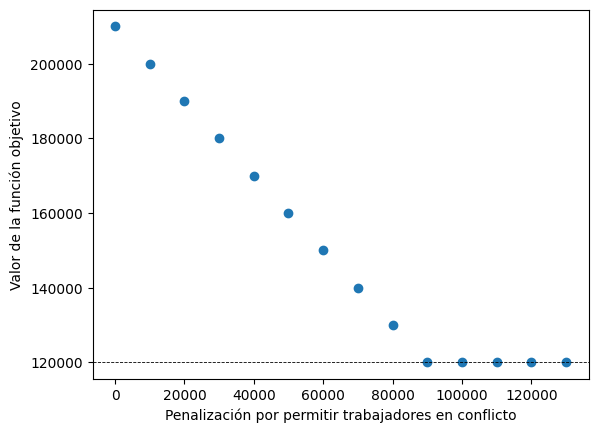

In [9]:
plt.scatter(grilla,y)
plt.axhline(120000, c= 'black',ls = '--',lw=0.6,label = 'Limite de tolerancia conflictos')
plt.xlabel('Penalización por permitir trabajadores en conflicto')
plt.ylabel('Valor de la función objetivo')